# Exploratory Data Analysis of 2012 Hawaii Dataset

This Jupyter notebook contains code and output used for Exploratory Data Analysis (EDA) appllied to the 2012 Hawaii dataset (located in `[path of the repository]/data/hawaii/2012`). Initial experiments will be performed on the 2012 Hawaii dataset as it follows previous work by others in the field. This notebook can be used to explore the data and produce figures and summary statistics for the data, with any insights from the data used to inform later modeling and experimental work. 

The following data analysis is divided into a few different sections:

1. Obtaining the daily, hourly, and minute averages and obtaining the general time frame of the anomaly
2. General visualization of the Ground Station and Satellite Values
3. Geographic visualization of the data based on latitude and longitude
4. Analysis of the distribution of data and finding a way to normalize it

## Imports 

First, import the necessary libraries to run the code and perform the analysis. These can be installed using [pip](https://pip.pypa.io/en/stable/) and referencing `requirements_notebooks.txt`. 

In [4]:
#importing all modules necessary for the necessary notebooks
import matplotlib.pyplot as plt
import numpy as np
import sys
import os 
import pandas as pd
from pathlib import Path
from scipy.stats import norm, ttest_ind
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.express as px
import probscale
# could not locate the mapbox token
## read mapbox access token 
# px.set_mapbox_access_token(open("../.mapbox_token").read())
import seaborn as sns

# load any resources from this library 
from src import data

## Read in the Data 

The 2012 Hawaii dataset is loaded into memory, one dataframe for each day. 

In [5]:
days = list(range(300, 305))
days

[300, 301, 302, 303, 304]

In [6]:
year = 2012
location = "hawaii"

In [7]:
dataframes = list()
for d in days: 
    
    print("\n--- " + str(d) + "---")
    
    # read in the data 
    df = data.read_day(
        location=location,
        year=year,
        day_of_year=d
    )
    dataframes.append(df)


  1%|          | 9/1595 [00:00<00:19, 82.02it/s]


--- 300---
Reading dataframes...


100%|██████████| 1595/1595 [00:20<00:00, 79.28it/s]


Concatenating dataframes...


  1%|          | 9/1596 [00:00<00:17, 88.66it/s]


--- 301---
Reading dataframes...


100%|██████████| 1596/1596 [00:19<00:00, 79.92it/s]


Concatenating dataframes...


  1%|          | 9/1597 [00:00<00:18, 85.60it/s]


--- 302---
Reading dataframes...


100%|██████████| 1597/1597 [00:20<00:00, 77.52it/s]


Concatenating dataframes...


  0%|          | 7/1597 [00:00<00:23, 68.48it/s]


--- 303---
Reading dataframes...


100%|██████████| 1597/1597 [00:20<00:00, 78.90it/s]


Concatenating dataframes...


  1%|          | 8/1596 [00:00<00:20, 76.70it/s]


--- 304---
Reading dataframes...


100%|██████████| 1596/1596 [00:21<00:00, 73.50it/s]


Concatenating dataframes...


## Analysis of Averages


#### the setup for data containers

## Visualization of the Ground Station and Satellite Values

Here, we plot `dStec/dt` values by ground station and satellite in order to identify time ranges in the data that experience anomalies in those values as the result of a tsunami wave. 

In [8]:
# concatenate the dataframes loaded previously into one large dataframe 
df_all = pd.concat(dataframes) 

In [9]:
df_all.shape

(28804, 9600)

In [10]:
df_all.sample(frac=1.).head()

,pg2r__G03,pg2r__G03_lon,pg2r__G03_lat,pg2r__G03_h_ipp,pg2r__G03_ele,pg2r__G03_azi,pg2r__G17,pg2r__G17_lon,pg2r__G17_lat,pg2r__G17_h_ipp,...,pgf3__G09_lat,pgf3__G09_h_ipp,pgf3__G09_ele,pgf3__G09_azi,pgf3__G12,pgf3__G12_lon,pgf3__G12_lat,pgf3__G12_h_ipp,pgf3__G12_ele,pgf3__G12_azi
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-10-29 00:21:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-27 07:48:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-26 13:56:30,NaN,NaN,NaN,NaN,NaN,NaN,0.000102,-152.683653,19.112811,349992.278664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-28 20:32:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-29 01:23:30,-0.005759,-155.924374,20.295842,350032.468091,68.169736,324.737642,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# minute level average 
df_minute = df_all.resample('1Min').mean()

In [12]:
# 5 minutes 
df_5_minute = df_all.resample('5T').mean()

In [13]:
# 20 minutes
df_20_minute = df_all.resample('20T').mean()

In [14]:
# hour level average 
df_hour = df_all.resample('60T').mean()

We want to visualize the time period of the suspected tsunami wave and see its affect on the `dStec/dt` (slant electron content) values. Wave-like patterns in these values indicate that a gravitational wave has hit the ionosphere, which can be caused by tsunami waves. 

In [15]:
df_minute.head()

,pg2r__G03,pg2r__G03_lon,pg2r__G03_lat,pg2r__G03_h_ipp,pg2r__G03_ele,pg2r__G03_azi,pg2r__G17,pg2r__G17_lon,pg2r__G17_lat,pg2r__G17_h_ipp,...,pgf3__G09_lat,pgf3__G09_h_ipp,pgf3__G09_ele,pgf3__G09_azi,pgf3__G12,pgf3__G12_lon,pgf3__G12_lat,pgf3__G12_h_ipp,pgf3__G12_ele,pgf3__G12_azi
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-10-26 00:00:00,-0.005581,-158.785435,23.827697,349966.870265,25.826925,323.940675,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-26 00:01:00,-0.004501,-158.735388,23.789117,350003.031730,26.112613,324.076816,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-26 00:02:00,-0.005584,-158.669447,23.737631,350014.803092,26.495024,324.256752,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-26 00:03:00,-0.005195,-158.604703,23.686405,350009.208544,26.879094,324.434708,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-26 00:04:00,-0.004841,-158.541155,23.635453,349985.784908,27.264660,324.610592,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#only obtaining the plots for ahup_G10,20, 13, 23, 4, 7, 8 according to previous work 
targetSat = pd.concat(
    [df_minute.filter(regex='ahup__G[0][478]', axis=1), 
     df_minute.filter(regex='ahup__G[1][03]', axis=1), 
     df_minute.filter(regex='ahup__G[2][03]', axis=1)], 
    axis=1
)

In [17]:
targetSat.shape

(7200, 42)

In [19]:
targetSat.describe()

,ahup__G04,ahup__G04_lon,ahup__G04_lat,ahup__G04_h_ipp,ahup__G04_ele,ahup__G04_azi,ahup__G07,ahup__G07_lon,ahup__G07_lat,ahup__G07_h_ipp,...,ahup__G23_lat,ahup__G23_h_ipp,ahup__G23_ele,ahup__G23_azi,ahup__G20,ahup__G20_lon,ahup__G20_lat,ahup__G20_h_ipp,ahup__G20_ele,ahup__G20_azi
count,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,1878.000000,1878.000000,1878.000000,1878.000000,...,2231.000000,2231.000000,2231.000000,2231.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000
mean,0.002036,-154.591610,18.590177,350000.101619,22.301347,185.230668,-0.002045,-153.350059,20.748935,349999.729466,...,19.817408,349999.941772,36.747756,154.531311,-0.000653,-155.120750,19.145703,349999.394223,38.365926,175.289871
std,0.003342,5.676106,5.862317,18.346038,11.111571,93.546106,0.004013,3.904395,3.224307,18.886254,...,3.191359,18.601972,19.859290,115.933432,0.005951,4.055681,3.324415,18.923251,14.147494,115.760830
min,-0.010171,-166.055459,3.466522,349950.131384,1.314513,38.358872,-0.019834,-159.535368,6.352024,349953.456259,...,6.718247,349950.809531,0.188132,0.254165,-0.019938,-167.391786,5.503559,349951.232068,2.141870,0.168979
25%,0.000040,-159.039595,14.726461,349986.841945,13.195119,97.963924,-0.002276,-155.995948,18.560390,349985.707273,...,18.405030,349986.804798,18.745147,52.887232,-0.002253,-157.472029,17.060755,349985.743459,30.485963,82.137533
50%,0.001297,-158.591563,18.954366,350000.143272,21.769382,200.327517,-0.000904,-155.213493,21.150700,349999.284973,...,20.652943,349999.491386,38.366220,101.078090,0.000352,-154.112988,20.522964,349999.386633,40.826026,136.565084
75%,0.003535,-148.789830,22.403563,350013.164828,29.810630,269.094579,-0.000005,-151.828007,23.699832,350013.179963,...,22.275334,350013.000104,55.299324,256.123380,0.001829,-152.391413,21.845008,350012.788733,50.684349,301.666697
max,0.017623,-142.683630,32.482152,350049.245312,42.594859,321.569434,0.016749,-141.445123,24.581727,350049.672032,...,22.920850,350048.469857,65.060453,359.740301,0.019611,-146.005467,22.307066,350048.778821,55.602883,359.749965


In [20]:
targetSat.head()

,ahup__G04,ahup__G04_lon,ahup__G04_lat,ahup__G04_h_ipp,ahup__G04_ele,ahup__G04_azi,ahup__G07,ahup__G07_lon,ahup__G07_lat,ahup__G07_h_ipp,...,ahup__G23_lat,ahup__G23_h_ipp,ahup__G23_ele,ahup__G23_azi,ahup__G20,ahup__G20_lon,ahup__G20_lat,ahup__G20_h_ipp,ahup__G20_ele,ahup__G20_azi
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-10-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-26 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-26 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-26 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-26 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


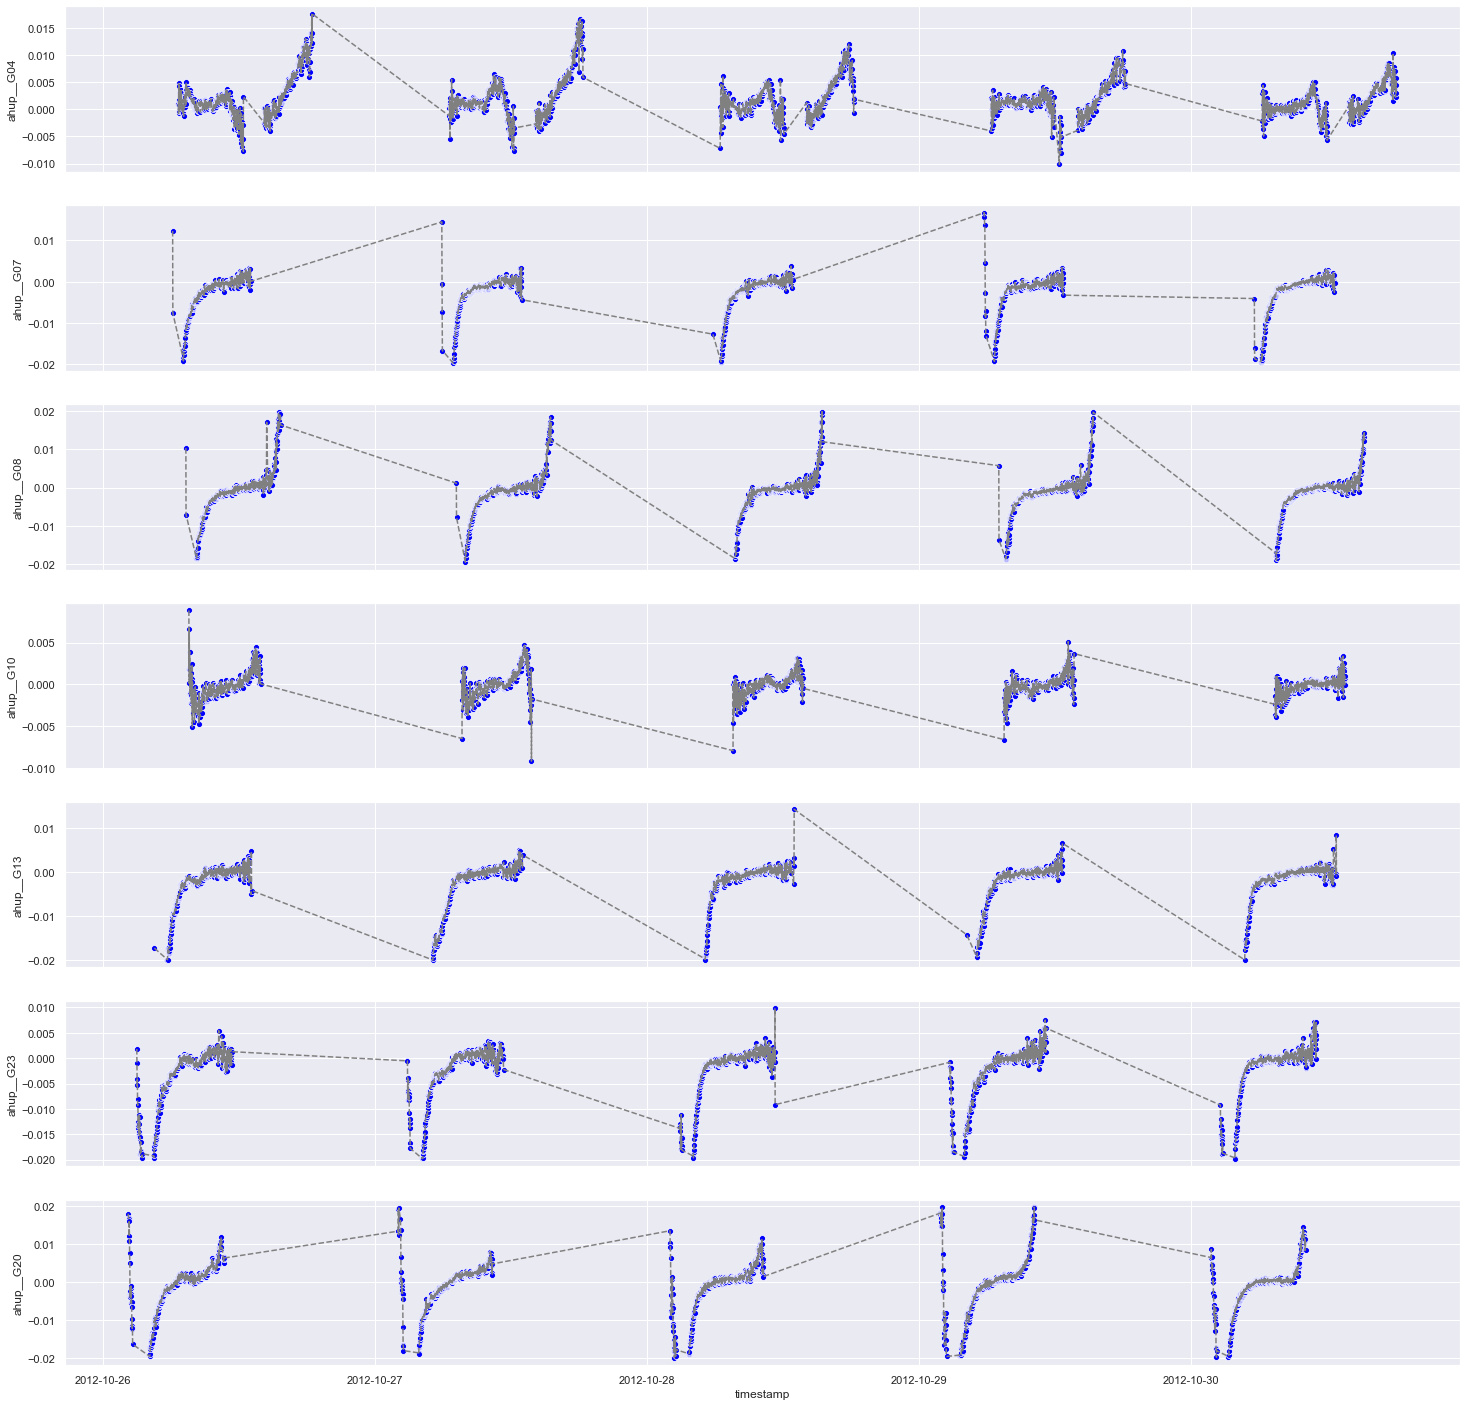

In [21]:
# ecreate subplots similar to the paper
sats = list()
for sat in targetSat:
    if "lat" not in sat and "lon" not in sat and "ele" not in sat and "azi" not in sat and "ipp" not in sat:
        sats.append(sat)


sns.set(style="darkgrid")
f, axes = plt.subplots(len(sats), 1, figsize=(25,25), sharex=True)
i = 0

for sat in sats:
    ax = sns.lineplot(x=targetSat.index, y=sat, ax=axes[i], data=targetSat, color="gray")
    ax.lines[0].set_linestyle("--")
    
    ax2 = sns.scatterplot(x=targetSat.index, y=sat,
                data=targetSat, ax=axes[i],
                color="blue")
    
    i += 1


plt.show()

From the above plot, we can see that there are many gaps in the data prior to the day of the earthquake. This can be very problematic for predictive modeling. 

In [22]:
# #obtaining day 302 values from 8 am to 10 am
start_date = "2012-10-28 08:00:00"
end_date = "2012-10-28 10:00:00"
mask = (targetSat.index > start_date) & (targetSat.index <= end_date)
targetSat_section = targetSat.loc[mask]

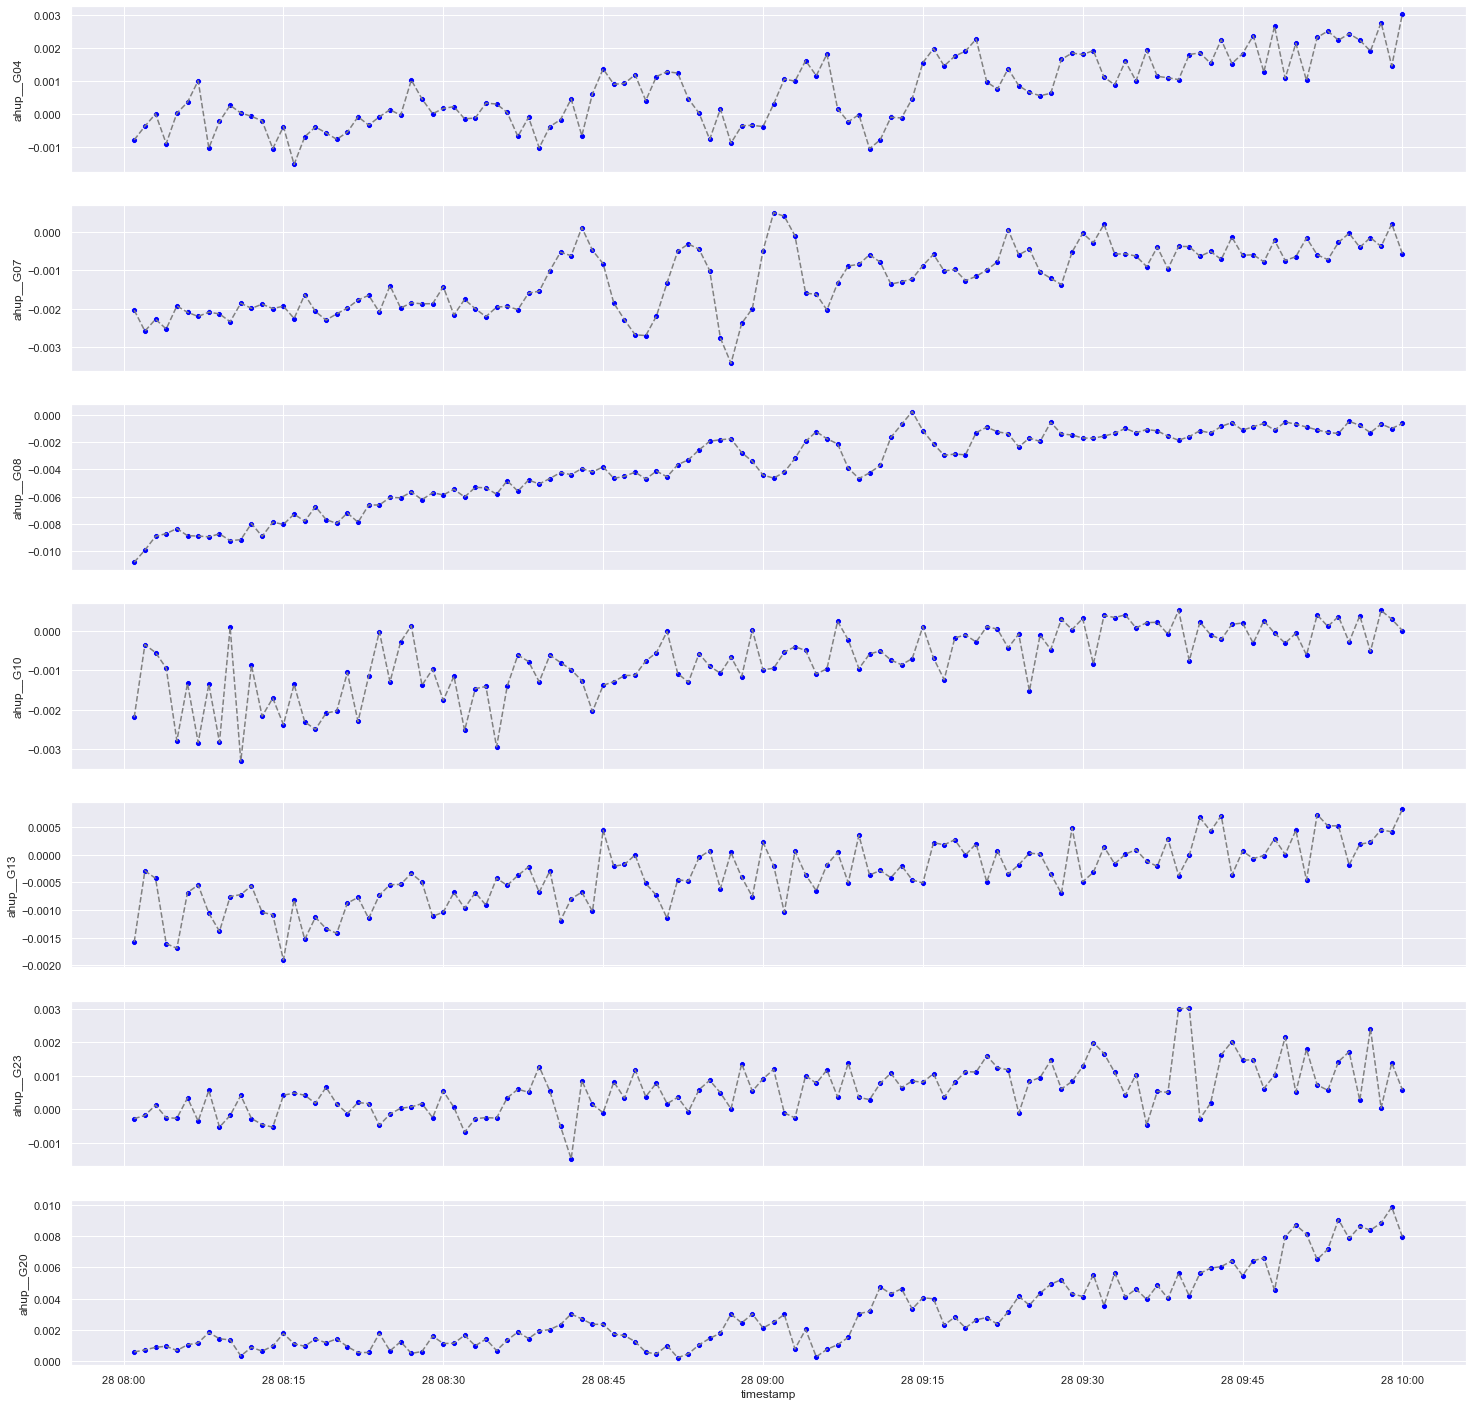

In [23]:
# ecreate subplots similar to the paper
sats = list()
for sat in targetSat_section:
    if "lat" not in sat and "lon" not in sat and "ele" not in sat and "azi" not in sat and "ipp" not in sat:
        sats.append(sat)


sns.set(style="darkgrid")
f, axes = plt.subplots(len(sats), 1, figsize=(25,25), sharex=True)
i = 0

for sat in sats:
    ax = sns.lineplot(x=targetSat_section.index, y=sat, ax=axes[i], data=targetSat_section, color="gray")
    ax.lines[0].set_linestyle("--")
    
    ax2 = sns.scatterplot(x=targetSat_section.index, y=sat,
                data=targetSat_section, ax=axes[i],
                color="blue")
    
    i += 1


plt.show()

In [24]:
targetSat_section[sats].var()

ahup__G04    1.051722e-06
ahup__G07    6.888687e-07
ahup__G08    7.824460e-06
ahup__G10    7.579088e-07
ahup__G13    3.199299e-07
ahup__G23    5.620364e-07
ahup__G20    5.783828e-06
dtype: float64

**Observation:** those with the highest variance in the data are not necessarily those which exhibit the most distinct gravitational wave patterns as seen through the slant electron content `dStec/dt`. 

## Geographic Visualizations (Latitude, Longtitude)

For this section, we'll select a particular day of year (`doy`) to visualize the data - the day of the earthquake - and show the data geographically based on the latitude and longitude. 

In [36]:
df = dataframes[2]

In [37]:
df.head()

,mles__G30,mles__G30_lon,mles__G30_lat,mles__G30_h_ipp,mles__G30_ele,mles__G30_azi,pgf4__G28,pgf4__G28_lon,pgf4__G28_lat,pgf4__G28_h_ipp,...,kaep__G03_lat,kaep__G03_h_ipp,kaep__G03_ele,kaep__G03_azi,mles__G29,mles__G29_lon,mles__G29_lat,mles__G29_h_ipp,mles__G29_ele,mles__G29_azi
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-10-28 00:00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-28 00:00:30,0.699561,-157.084116,18.083569,350022.032541,55.567099,226.815319,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.545920,-146.683385,15.679230,349986.270917,13.435877,112.603594
2012-10-28 00:00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-28 00:01:00,0.698715,-157.084745,18.066226,349993.349675,55.395757,226.471406,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.646378,-146.647307,15.628373,350017.320874,13.313939,112.794484
2012-10-28 00:01:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df.columns.values

array(['mles__G30', 'mles__G30_lon', 'mles__G30_lat', ...,
       'mles__G29_h_ipp', 'mles__G29_ele', 'mles__G29_azi'], dtype=object)

The primary value we are concerned with is the TEC variation, or `dStec/dt`. This value is influenced by several exogenous factors (to the satellite) - altitude, geographic position, and atmospheric conditions, among others. 

We wish to compare _relative_ differences across satellites and changes for a particular satellite in the persuit of performing anomaly (tsunami) detection. As such, we will need to scale values across the satellites on the same scale prior to analysis of the data. We will load a rescaling function which takes any dataframes loaded into memory and rescales the data on a specified range (`[0, 1]` is the default). 

**Aside:** data normalization is also an important task to perform prior to modeling the data, as differences in the scale of values fed as inputs to the model can disproportionally outweigh inputs which do not provide large predictive power in the model(s). 



In [39]:
df_normalized = data.rescale(df)

/Users/vconstan/Files/Projects/tsunami/venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning:

All-NaN slice encountered

/Users/vconstan/Files/Projects/tsunami/venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning:

All-NaN slice encountered

/Users/vconstan/Files/Projects/tsunami/venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning:

All-NaN slice encountered

/Users/vconstan/Files/Projects/tsunami/venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning:

All-NaN slice encountered

/Users/vconstan/Files/Projects/tsunami/venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning:

All-NaN slice encountered

/Users/vconstan/Files/Projects/tsunami/venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning:

All-NaN slice encountered

/Users/vconstan/Files/Projects/tsunami/venv/lib/python3.7/site-packages/sklearn/preproce

In [40]:
# all values should be between 0 and 1
df_normalized.head()

,mles__G30,mles__G30_lon,mles__G30_lat,mles__G30_h_ipp,mles__G30_ele,mles__G30_azi,pgf4__G28,pgf4__G28_lon,pgf4__G28_lat,pgf4__G28_h_ipp,...,kaep__G03_lat,kaep__G03_h_ipp,kaep__G03_ele,kaep__G03_azi,mles__G29,mles__G29_lon,mles__G29_lat,mles__G29_h_ipp,mles__G29_ele,mles__G29_azi
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-10-28 00:00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-28 00:00:30,0.699561,-157.084116,18.083569,350022.032541,55.567099,226.815319,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.545920,-146.683385,15.679230,349986.270917,13.435877,112.603594
2012-10-28 00:00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-28 00:01:00,0.698715,-157.084745,18.066226,349993.349675,55.395757,226.471406,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.646378,-146.647307,15.628373,350017.320874,13.313939,112.794484
2012-10-28 00:01:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_normalized["mles__G30"].describe()

count    995.000000
mean       0.560158
std        0.178249
min        0.000000
25%        0.462981
50%        0.549098
75%        0.672454
max        1.000000
Name: mles__G30, dtype: float64

The data contains a Pandas DateTime index to provide indications of the time in which the observation was recorded (the index) and columns which correspond to the `dStec/dt`, `lon`, and `lat` of each combination of satellite, ground station readings. This information can be used to not only plot the `dStec/dt` values through time, but according to a specific geographic location (the `lat`, `lon` columns). 

In [42]:
def geographic_dataframe(dataframe: pd.DataFrame, satellites: list = None, ground_stations: list = None) -> 'pd.DataFrame': 
    """
    Constructs a dataframe that can be used for plotting or subsequent analysis which is pivoted 
    so that there are columns for latitude and longitude coordiantes and dStec/dt values. Returns 
    a pandas dataframe. 
    
    :param dataframe: an input pandas dataframe that contains dStec/dt values for pairs of satellite, ground station 
    combinations. 
    :param satellites: a list of satellites to retain in the reformatting. 
    :param ground_stations: a list of ground stations to retain in the reformatting. 
    """
    
    # get lists of all satellites and ground stations 
    # if none, use all satellites    
    # else, filter for the satellites provided in the input list 
    if satellites is None: 
        satellites = list(set([col_name.split("__")[0] for col_name in dataframe.columns.values]))
    
    # if none, use all ground stations 
    # if ground stations specified, then filter the selection of satellites 
    if ground_stations is None: 
        ground_stations = list(set([col_name.split("__")[1] for col_name in dataframe.columns.values]))
    
    # filter the dataframe for those ground stations and satellites 
    dataframe = dataframe.loc[:, dataframe.columns.str.contains("|".join(satellites))]
    dataframe = dataframe.loc[:, dataframe.columns.str.contains("|".join(ground_stations))]
    
    # melt all of the dStec/dt values from the satellites into single column, same with lat and lon
    value_vars = [col for col in dataframe.columns.values if "lat" not in col and "lon" not in col]
    lat_vars = [col for col in dataframe.columns.values if "lat" in col]
    lon_vars = [col for col in dataframe.columns.values if "lon" in col]

    dataframe_melt = pd.melt(dataframe, id_vars=lon_vars + lat_vars, value_vars=value_vars)
    
    # combine all of the lat, lon columns 
    # TODO: there are implications to this merge operation
    dataframe_melt = dataframe_melt.assign(lat=dataframe_melt[lat_vars].mean(1)).drop(lat_vars, 1)
    dataframe_melt = dataframe_melt.assign(lon=dataframe_melt[lon_vars].mean(1)).drop(lon_vars, 1)

    # recode 0.0 lat, lon values as missing 
    dataframe_melt[["lat", "lon"]] = dataframe_melt[["lat", "lon"]].replace(0.0, np.nan)

    # extract the ground station and satellite from the dataframe and create new columns for each 
    dataframe_melt['satellite'] = dataframe_melt['variable'].apply(lambda x: x.split("__")[1].split("_")[0])
    dataframe_melt['ground_station'] = dataframe_melt['variable'].apply(lambda x: x.split("__")[0])
        
    return dataframe_melt
    

The resulting dataframe becomes very large and thus it can be difficult to visualize all of the data. For now, we'll start with a smaller range of time and select a particular hour to visualize.

In [43]:
HOURS = [7, 8, 9, 10, 11]

We're going to use the rescaled values for now so that we can draw relative comparisons between the satellites (and to some degree the readings across the ground stations). It is reasonable to suspect that the variations in slant electron content, `dStec/dt`, vary in their behavior depending on the conditions experienced by the satellite (location, time, etc.). Thus, their slant electron content values cannot be compared directly. While we lose some interpretability when rescaling the values, it is a necessary step to comparing "apples to apples" for the purposes of identifying distinct patterns in the data (and, subsequently, modeling).

We are focused on detecting **anomalies**, or _changes_ in the behavior of the slant electron content to support that. As such, it is not so much the raw values which are important to examine but rather the relative changes at various points in time, across satellites and geographic locations. 

In [44]:
df_time_slice = df_normalized[df_normalized.index.hour.isin(HOURS)]

In [45]:
df_time_slice.head()

,mles__G30,mles__G30_lon,mles__G30_lat,mles__G30_h_ipp,mles__G30_ele,mles__G30_azi,pgf4__G28,pgf4__G28_lon,pgf4__G28_lat,pgf4__G28_h_ipp,...,kaep__G03_lat,kaep__G03_h_ipp,kaep__G03_ele,kaep__G03_azi,mles__G29,mles__G29_lon,mles__G29_lat,mles__G29_h_ipp,mles__G29_ele,mles__G29_azi
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-10-28 07:00:00,0.379171,-143.661202,22.357801,350005.400440,8.986198,73.400041,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-28 07:00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-28 07:00:30,0.441489,-143.673979,22.400244,349992.763959,8.989869,73.179923,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-28 07:00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-28 07:01:00,0.472290,-143.685259,22.442975,350031.827557,8.992835,72.959849,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We'll start by reading the same satellites used in experients from [Real-Time Detection of Tsunami Ionospheric Disturbances with a 
Stand-Alone GNSS Receiver: A Preliminary Feasibility Demonstration](https://www.nature.com/articles/srep46607.pdf).

In [ ]:
geo_df = geographic_dataframe(
    dataframe=df_time_slice,
    satellites=["G04", "G07", "G08", "G10", "G13", "G20", "G23"]
)

In [ ]:
# let's make sure these all fall between 0 and 1
geo_df["value"].describe()

In [ ]:
geo_df.sample(frac=1.).head()

In [ ]:
geo_df.shape

There's are empty values in the dataframe because the `dStec/dt` values are not available continuously for each satellite. For the purposes of visualization, these values are not needed and thus we will drop them fromt the dataset (when modeling, understandng when values are available and when they are missing is an important piece of information). 

In [ ]:
geo_df = geo_df[geo_df["value"].notna()]

In [ ]:
geo_df.shape

It looks like many of the values are missing, and the size of the dataset (in this case) is cut by about half. 

### Distribution of Latitude and Longitude Values

Let's plot a geographic map of where the values are recorded and the values of the observations (rescaled between 0 and 1). The below uses [seaborn]() and [matplotlib](). 

In [ ]:
# set the seaborn style 
sns.set(style="darkgrid")

# set the plot size
f, ax = plt.subplots(figsize=(12, 12))
ax.set_aspect("equal")

# first, plot a kernel density plot of the values 
ax = sns.kdeplot(geo_df_dstecdt["lat"], geo_df_dstecdt["lon"], shade=True, cmap="Reds", shade_lowest=False, cut=5)

# then, plot the individual values
# note: the scatterplot could be an option in the eventual generalization / function of this 
ax = sns.scatterplot(x=geo_df_dstecdt["lat"], y=geo_df_dstecdt["lon"],
                hue=geo_df_dstecdt["value"],
                palette="viridis")

# set the title 
ax.set_title("Distribution of dStec/dt Values")

plt.show()


### dStec/dt Values by Coordinate Position (Latitude, Longitude)

This plot draws a [matplotlib]() scatterplot above a geographic map of the region surrounding where the observations from the satellites were recorded, providing some context as to the distance from a known land mass. 

In [ ]:
# thanks: https://stackoverflow.com/questions/20768777/how-to-draw-a-high-resolution-etopo-background-in-matplotlib-basemap

# set the figure size 
f, ax = plt.subplots(figsize=(10, 10))

# first draw the geographic map 
ax = Basemap(projection='lcc', resolution='h', 
            lat_0=geo_df_dstecdt["lat"].mean()+0.3, lon_0=geo_df_dstecdt["lon"].mean()-1.5,
            width=7e5, height=7e5,
            epsg=3561) #3561, 3759, 2782, 2783
ax.shadedrelief()
ax.drawcoastlines(color='gray')
# ax.drawcountries(color='gray')
# ax.drawstates(color='gray')
# ax.fillcontinents()
# ax.fillcontinents(color='gray', ocean_color='white')
# ax.bluemarble()
# ax.shadedrelief()
# ax.etopo()
ax.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2000, verbose= True)

# then add the scatterplot on top 
ax.scatter(geo_df_dstecdt["lon"].values, geo_df_dstecdt["lat"].values, latlon=True,
          c=geo_df_dstecdt["value"].values, s=10,
          cmap='viridis', alpha=1.)

# set the title and scale the colorbar to the same height
plt.title('Rescaled dStec/dt Values for Satellites ' + ", ".join(sorted(list(set(list(geo_df_dstecdt["satellite"].values))))) + "\n")
plt.colorbar(label="dStec/dt", fraction=0.046, pad=0.04)

plt.show()

The imagery used in the above plot is a high resolution. 

In [ ]:
# thanks: https://stackoverflow.com/questions/20768777/how-to-draw-a-high-resolution-etopo-background-in-matplotlib-basemap

# set the figure size 
f, ax = plt.subplots(figsize=(10, 10))

# first draw the geographic map 
ax = Basemap(projection='lcc', resolution='h', 
            lat_0=geo_df_dstecdt["lat"].mean()+0.3, lon_0=geo_df_dstecdt["lon"].mean()-1.5,
            width=1e5, height=1e5,
            epsg=3561) #3561, 3759, 2782, 2783
ax.shadedrelief()
ax.drawcoastlines(color='gray')
# ax.drawcountries(color='gray')
# ax.drawstates(color='gray')
# ax.fillcontinents()
# ax.fillcontinents(color='gray', ocean_color='white')
# ax.bluemarble()
# ax.shadedrelief()
# ax.etopo()
ax.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2000, verbose= True)

plt.show()

The high resolution plots are a nice touch. 

## Distributions of Values  (By Satellite and Ground Station)

We can use the same dataset from the above geographic visualizations to examine the distribution of values, based on the satellites or ground stations. We can start with a simple histogram of `dStec/dt` values. 

### Histogram of Normalized dStec/dt Values

We can get a sense of the distribution of values by plotting a histogram. 

First, we need to drop any rows that are not the `dStec/dt` values. 

In [ ]:
geo_df_dstecdt = geo_df[geo_df["variable"].str.contains("ele|ipp|azi") == False].dropna()

In [ ]:
geo_df_dstecdt.sample(frac=1).head(10)

In [ ]:
geo_df_dstecdt.shape

In [ ]:
# in seaborn / matplotlib 

# first, set the seaborn figure asthetics 
sns.axes_style("darkgrid")

plt.figure(figsize=(10, 7))
sns.distplot(
    geo_df_dstecdt["value"], 
    hist=True, 
    color="b", 
#     kde_kws={"shade": True},
    kde=False,
    fit=norm,
    rug=False
).set_title(
    'Distribution of Rescaled dStec/dt Values\n'
)

plt.show()

In [ ]:
# in Plotly 

fig = px.histogram(geo_df_dstecdt, x="value")
fig.update_layout(
    title="Distribution of Rescaled dStec/dt Values"
)
fig.show()

While the data skews left, it looks to at least somewhat represent a normal distribution of values. 

In [ ]:
mu, sigma = 0, 0.1


ttest_ind(norm.rvs(size=geo_df_dstecdt.shape[0]), geo_df_dstecdt["value"].values)

### Distributution of Values Across Ground Stations

We can plot these values across ground stations and (later) satellites and see if there are any significant differences in the distributions. We will limit the number of ground stations for now to illustrate the effect of plotting the data this way. 

In [ ]:
ground_station_subset = ["radf", "sfpc", "crim", "joka"]

In [ ]:
sns.pairplot(
    geo_df_dstecdt[geo_df_dstecdt["ground_station"].isin(ground_station_subset)],
    hue="ground_station", 
    height=4
)

plt.show()

The results above indicate that `radf` exhibits a bimodal distribution of values, possibly from taking readings from more than one satellite. `crim` and `joka` exhibit different distributions in their `dStec/dt` values. 

We can also look at particular satellites. As above, we will limit the number of satellites examined. The satellites examined below are [noted to exhibit the greatest amount of fluctuation](https://github.com/vc1492a/sTEC-d-dt-Anomaly-Detection/issues/28). 

In [ ]:
satellite_subset = ["G04", "G07", "G08", "G10", "G20"] 

In [ ]:
sns.pairplot(
    geo_df_dstecdt[geo_df_dstecdt["satellite"].isin(satellite_subset)], 
    hue="satellite", 
    height=3
)

plt.show()

### Boxplot of dStec/dt Values

Boxplots may also be helpful in determining which ground stations exhibit the greatest number of outlying `dStec/dt` values. 

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x="ground_station", y="value",
            hue="ground_station",
            data=geo_df_dstecdt[geo_df_dstecdt["ground_station"].isin(ground_station_subset)])
sns.despine(offset=10, trim=True)

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x="satellite", y="value",
            hue="satellite",
            data=geo_df_dstecdt[geo_df_dstecdt["satellite"].isin(satellite_subset)])
sns.despine(offset=10, trim=True)

### QQ Plot

Lastly, we can help identify which satellites exhibit the greatest variation by examining the Q-Q plot. The closer the values shown in the plot are to a straight line, the more likely those values come from a normal distribution of values. The linearity of the observations (points) corresponds to the likelihood that they stem from a normal distribution. 

In [ ]:
fg = (
    sns.FacetGrid(
        data=geo_df_dstecdt[(geo_df_dstecdt["satellite"].isin(satellite_subset)) & (geo_df_dstecdt["ground_station"].isin(ground_station_subset))], 
        row='satellite', 
        col='ground_station', 
        margin_titles=True, 
        height=4
    ).map(
        probscale.probplot, 'value', probax='y', bestfit=True
    ).add_legend()
)